In [2]:
# import applicable modules

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')

In [3]:
# import the data
circuits_df = pd.read_csv('circuits.csv')
constructor_results_df = pd.read_csv('constructor_results.csv')
constructor_standings_df = pd.read_csv('constructor_standings.csv')
constructors_df = pd.read_csv('constructors.csv')
driver_standings_df = pd.read_csv('driver_standings.csv')
drivers_df = pd.read_csv('drivers.csv')
lap_times_df = pd.read_csv('lap_times.csv')
pit_stops_df = pd.read_csv('pit_stops.csv')
qualifying_df = pd.read_csv('qualifying.csv')
races_df = pd.read_csv('races.csv')
results_df = pd.read_csv('results.csv')
seasons_df = pd.read_csv('seasons.csv')
sprint_results_df = pd.read_csv('sprint_results.csv')
status_df = pd.read_csv('status.csv')
display_names_df = pd.read_csv('team_display_names.csv')

# Most Successful Teams

In [4]:
# create dataframe merging applicable csvs
merge1 = constructor_standings_df.merge(races_df, on='raceId', how='left', suffixes=('_cs','_r'))
merge2 = merge1.merge(constructors_df, on='constructorId', how='left', suffixes=(None,'_co'))
df = merge2.merge(display_names_df, on='constructorRef', how='left', suffixes=(None,'_dn'))

In [5]:
# replace /N with NaN
df.replace('\\N',None, inplace=True)

In [6]:
df.columns

Index(['constructorStandingsId', 'raceId', 'constructorId', 'points',
       'position', 'positionText', 'wins', 'year', 'round', 'circuitId',
       'name', 'date', 'time', 'url', 'fp1_date', 'fp1_time', 'fp2_date',
       'fp2_time', 'fp3_date', 'fp3_time', 'quali_date', 'quali_time',
       'sprint_date', 'sprint_time', 'constructorRef', 'name_co',
       'nationality', 'url_co', 'display_name'],
      dtype='object')

In [7]:
# drop unwanted columns
cols_to_drop = ['circuitId', 'date', 'time', 'url', 'fp1_date', 'fp1_time', 'fp2_date',
       'fp2_time', 'fp3_date', 'fp3_time', 'quali_date', 'quali_time',
       'sprint_date', 'sprint_time', 'nationality', 'url_co']
df.drop(cols_to_drop, axis=1, inplace=True)

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
constructorStandingsId,12931.0,16564.665996,8739.173340,1.0,8768.5,20119.0,24584.5,28402.0
raceId,12931.0,514.554095,292.222557,1.0,294.0,493.0,714.0,1096.0
constructorId,12931.0,48.033795,59.358214,1.0,6.0,25.0,57.0,214.0
points,12931.0,33.802606,76.899408,0.0,0.0,6.0,31.0,765.0
position,12931.0,7.287449,4.387007,1.0,4.0,7.0,10.0,22.0
wins,12931.0,0.679452,1.819341,0.0,0.0,0.0,0.0,19.0
year,12931.0,1991.757095,17.354370,1958.0,1978.0,1990.0,2007.0,2022.0
round,12931.0,8.767071,4.897846,1.0,5.0,8.0,13.0,22.0


In [9]:
# sort values
df = df.sort_values(by=['constructorId', 'year', 'round'])
df

,constructorStandingsId,raceId,constructorId,points,position,positionText,wins,year,round,name,constructorRef,name_co,display_name
9603,21034,674,1,0.0,14,14,0,1968,8,German Grand Prix,mclaren,McLaren,McLaren
9597,21051,675,1,0.0,14,14,0,1968,9,Italian Grand Prix,mclaren,McLaren,McLaren
9591,21068,676,1,0.0,14,14,0,1968,10,Canadian Grand Prix,mclaren,McLaren,McLaren
9585,21085,677,1,0.0,14,14,0,1968,11,United States Grand Prix,mclaren,McLaren,McLaren
9579,21102,678,1,0.0,14,14,0,1968,12,Mexican Grand Prix,mclaren,McLaren,McLaren
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12888,28327,1092,214,143.0,4,4,0,2022,18,Japanese Grand Prix,alpine,Alpine F1 Team,Alpine F1 Team
12893,28367,1093,214,149.0,4,4,0,2022,19,United States Grand Prix,alpine,Alpine F1 Team,Alpine F1 Team
12907,28377,1094,214,153.0,4,4,0,2022,20,Mexico City Grand Prix,alpine,Alpine F1 Team,Alpine F1 Team
12915,28387,1095,214,167.0,4,4,0,2022,21,Brazilian Grand Prix,alpine,Alpine F1 Team,Alpine F1 Team


In [11]:
# add column indicating number of rounds each year
df['total_rounds'] = df.groupby('year')['round'].transform('max')

In [12]:
# add boolean column to determine indicate if this is the final round of that year
df['is_final_round'] = df['round'] == df['total_rounds']

# add column that includes a 1 indicating the team finished first place in the final round
# this will be used to find a cumulative total of championships
df['is_champ'] = np.where((df['is_final_round']) & (df['position'] == 1), 1, 0)

In [13]:
# add column to calculate a cumulative total of championships
df['cum_champs'] = df.groupby('constructorId')['is_champ'].cumsum()

In [14]:
# add column that indicates the total number of championships each team has one in history
df['total_champs'] = df.groupby('constructorId')['cum_champs'].transform('max')

In [15]:
# subset data to only contain final standings
df_final = df.loc[df['is_final_round']]

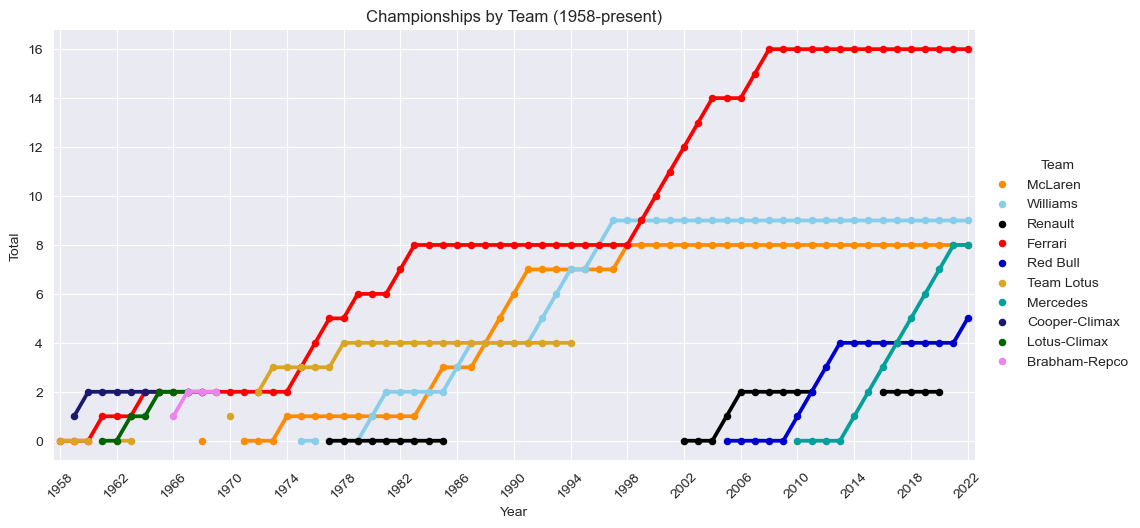

In [36]:
# create color palette
all_pal = ['darkorange','skyblue','black','red','mediumblue','goldenrod','#00A19B','midnightblue','darkgreen','violet']

# plot cumulative championships over time
fig = sns.catplot(data=df_final.loc[df_final['total_champs'] > 1], legend=False, kind='point', palette=all_pal, x='year', hue='name_co', y='cum_champs', markers='.', aspect=2)
fig.add_legend(title='Team')
fig.set(title='Championships by Team (1958-present)')
fig.set_axis_labels('Year', 'Total')
fig.set_xticklabels(step=4, rotation=45)
fig.ax.grid(color='white')
plt.show()

In [17]:
# subset data to show 2004 to present
temp2004 = df_final.loc[df.year>=2004]

In [18]:
# create a column that indicates the percent of total points for each team, each year
temp2004['percent_pts'] = temp2004['points'] / temp2004.groupby('year')['points'].transform('sum')

/var/folders/3z/d_msg6bj2ksf6j2jt9jvn0h80000gn/T/ipykernel_51804/1112922956.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp2004['percent_pts'] = temp2004['points'] / temp2004.groupby('year')['points'].transform('sum')


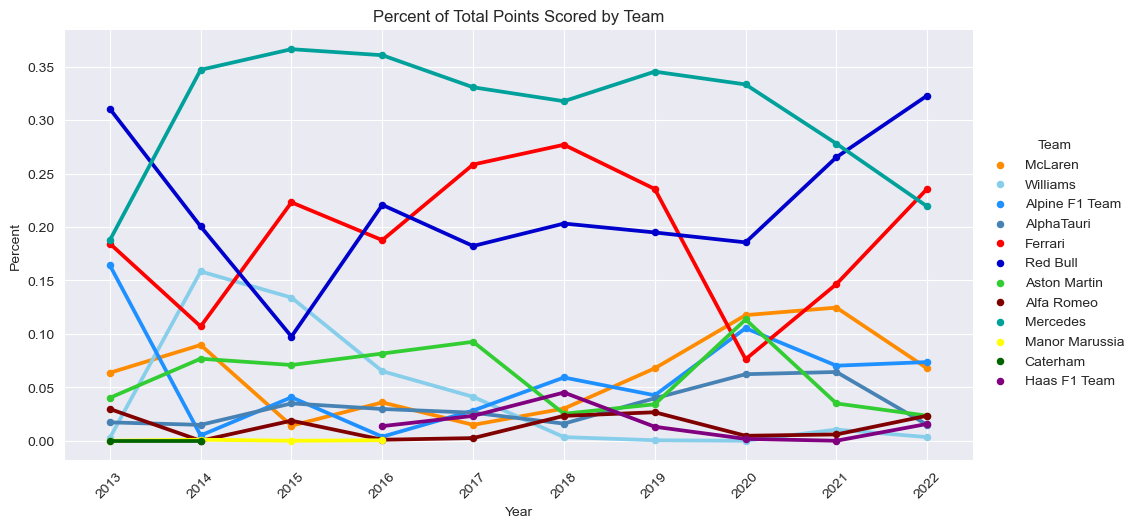

In [38]:
# plot illustrating each teams precent of total points earned 2004 - 2020
one_more_pal = ['darkorange', 'skyblue', 'dodgerblue', 'steelblue', 'red','mediumblue', 'limegreen','maroon','#00A19B','yellow',  'darkgreen','purple']
fig = sns.catplot(data=temp2004.loc[(temp2004.year<=2022) & (temp2004.year>=2013)], palette=one_more_pal, legend=False,  kind='point', x='year', hue='display_name', y='percent_pts', markers='.', aspect=2)
fig.add_legend(title='Team')
fig.set(title='Percent of Total Points Scored by Team')
fig.set_axis_labels('Year', 'Percent')
fig.set_xticklabels(rotation=45)
fig.ax.grid(color='white')
plt.show()

In [20]:
# create a custom color palette to highlight mercedes
pts_pal = ['#C8CCCE'] * 20
pts_pal[12] = "#00A19B"

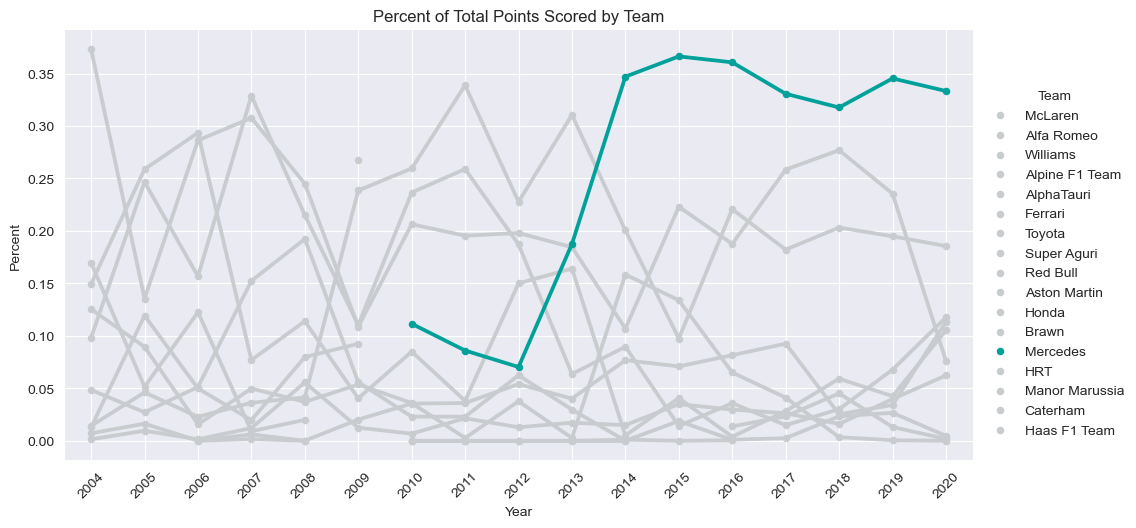

In [21]:
# re-plot same as above, with custom color palette; 2004 - 2020
fig = sns.catplot(data=temp2004.loc[temp2004.year<=2020], legend=False, palette=pts_pal, kind='point', x='year', hue='display_name', y='percent_pts', markers='.', aspect=2)
fig.add_legend(title='Team')
fig.set(title='Percent of Total Points Scored by Team')
fig.set_axis_labels('Year', 'Percent')
fig.set_xticklabels(rotation=45)
fig.ax.grid(color='white')
plt.show()

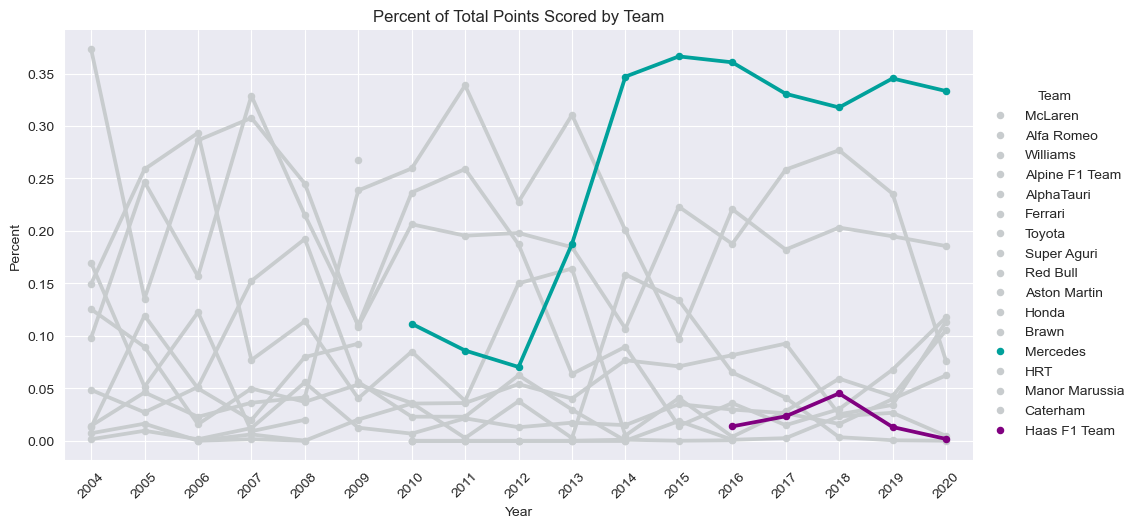

In [22]:
# add Haas color to palette
pts_pal[16] = 'purple'

# re-plot same as above, with custom color palette; 2004 - 2022
fig = sns.catplot(data=temp2004.loc[temp2004.year<=2020], legend=False, palette=pts_pal, kind='point', x='year', hue='display_name', y='percent_pts', markers='.', aspect=2)
fig.add_legend(title='Team')
fig.set(title='Percent of Total Points Scored by Team')
fig.set_axis_labels('Year', 'Percent')
fig.set_xticklabels(rotation=45)
fig.ax.grid(color='white')
plt.show()

In [23]:
# import budget from 2013 - 2022 and merge with dataframe
budget_df = pd.read_csv('budgets_2013_2023.csv')
temp2013 = temp2004.merge(budget_df, on=['constructorRef', 'year'], how='right', suffixes=('_left','_right'))

In [24]:
# create custom color palette illustrating team budgets, highlighting Mercedes and Haas
budg_pal = ['#C8CCCE'] * 20
budg_pal[9] = '#00A19B'
budg_pal[5] = 'purple'

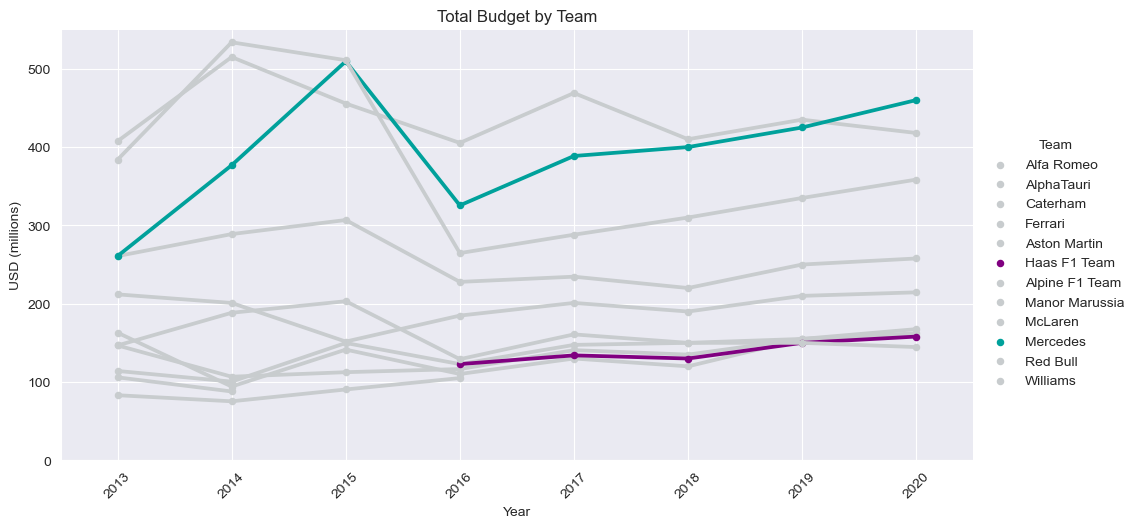

In [25]:
# plot budget numbers by team from 2013-2020
fig = sns.catplot(data=temp2013.loc[temp2013.year<=2020], legend=False, kind='point', x='year', palette=budg_pal, hue='display_name', y='budget_millions', markers='.', aspect=2)
fig.add_legend(title='Team')
fig.set(title='Total Budget by Team')
fig.set_axis_labels('Year', 'USD (millions)')
fig.set_xticklabels(rotation=45)
fig.ax.set_ylim(0,550)
fig.ax.grid(color='white')
plt.show()

In [26]:
# add column that indicates the percent of total budget spent by each team, each year
temp2013['pct_budget'] = temp2013['budget_millions'] / temp2013.groupby('year')['budget_millions'].transform('sum')

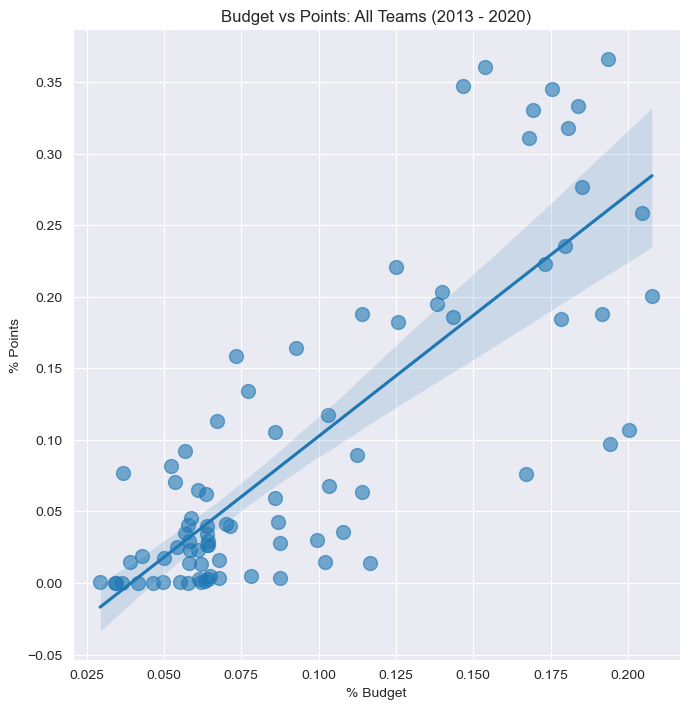

In [27]:
# plot scatter plot with percent of total budget on the x, and percent of total points on the y (excludes 2021-22)
fig = sns.lmplot(data=temp2013.loc[temp2013['year']<=2020], height = 7, x='pct_budget', y='percent_pts', scatter_kws={'alpha':0.6,'s':100})
fig.set(title='Budget vs Points: All Teams (2013 - 2020)')
fig.set_axis_labels('% Budget', '% Points')
plt.show()

In [28]:
# color_options = ['#00A19B', 'red', 'orange', 'blue', 'green']
color_options = ['#00A19B', 'blue', 'red']
color_conditions = [(temp2013['constructorRef'] == 'mercedes'), (temp2013['constructorRef'] == 'red_bull'), (temp2013['constructorRef'] == 'ferrari')]
# temp2013['color1'] = np.select(temp2013['constructorRef']=='mercedes', 'red', '#63666A')
temp2013['color1'] = np.select(color_conditions, color_options, default = '#63666A')

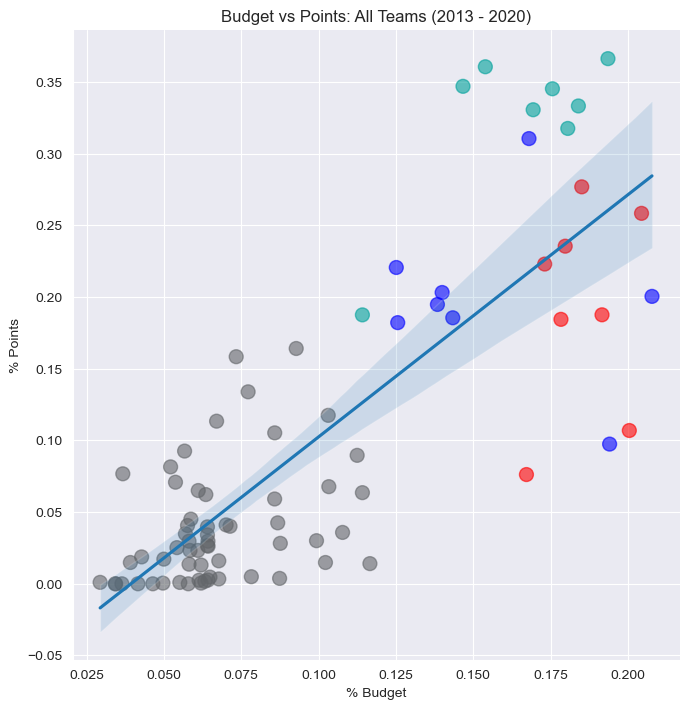

In [29]:
# plot scatter plot with percent of total budget on the x, and percent of total points on the y (excludes 2021-22)
fig = sns.lmplot(data=temp2013.loc[temp2013['year']<=2020], height = 7, x='pct_budget', y='percent_pts', scatter_kws={'alpha':0.6,'s':100, 'edgecolors':'face', 'facecolors':temp2013.loc[temp2013['year']<=2020]['color1']})
fig.set(title='Budget vs Points: All Teams (2013 - 2020)')
fig.set_axis_labels('% Budget', '% Points')
plt.show()

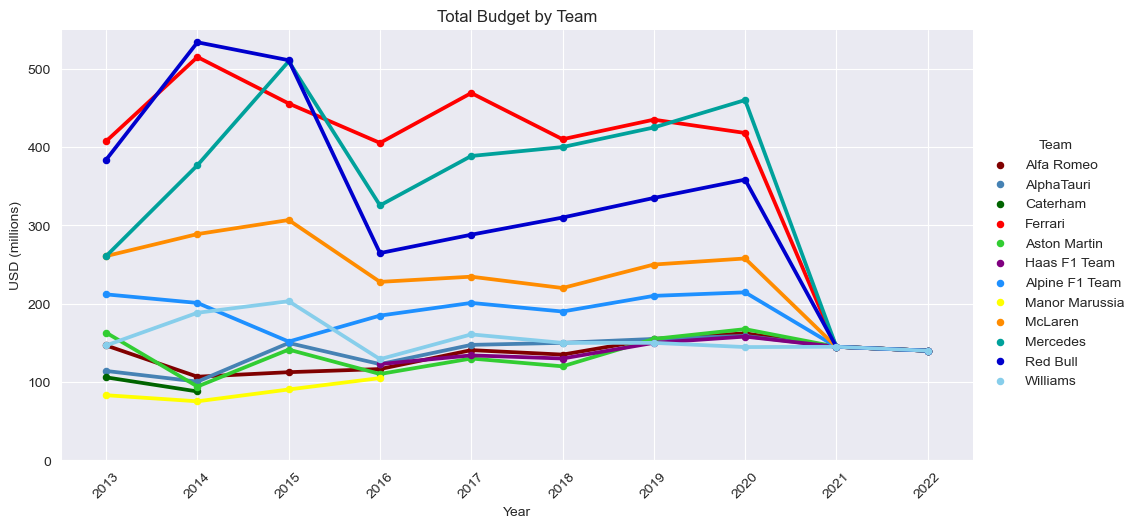

In [33]:
# plot budget numbers by team from 2013-2022
new_pal = ['maroon', 'steelblue','darkgreen','red','limegreen','purple','dodgerblue','yellow','darkorange','#00A19B','mediumblue','skyblue']

fig = sns.catplot(data=temp2013.loc[temp2013.year<=2022], legend=False, kind='point', palette=new_pal, x='year', hue='display_name', y='budget_millions', markers='.', aspect=2)
fig.add_legend(title='Team')
fig.set(title='Total Budget by Team')
fig.set_axis_labels('Year', 'USD (millions)')
fig.set_xticklabels(rotation=45)
fig.ax.set_ylim(0,550)
fig.ax.grid(color='white')
plt.show()